# DS-SF-27 | Codelaong 14 | Market Segmentation

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import decomposition, cluster

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
df = pd.read_csv(os.path.join('..', 'datasets', 'ford-ka.csv'), index_col = 'id')

In [3]:
df

,Q1,Q2,Q3,Q4,Q5,...,Q58,Q59,Q60,Q61,Q62
id,,,,,,,,,,,
1,6,2,4,3,1,...,3,4,4,4,2
2,7,7,7,5,4,...,4,3,5,4,5
3,5,4,6,5,7,...,4,5,3,4,4
4,4,2,5,4,2,...,2,5,5,5,3
5,5,5,7,6,7,...,5,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...
246,6,7,5,5,3,...,5,2,3,4,5
247,4,3,6,7,6,...,2,5,4,4,4
248,6,5,3,1,4,...,6,6,1,2,2


## Checking for NaN

In [4]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 62 columns):
Q1     250 non-null int64
Q2     250 non-null int64
Q3     250 non-null int64
Q4     250 non-null int64
Q5     250 non-null int64
Q6     250 non-null int64
Q7     250 non-null int64
Q8     250 non-null int64
Q9     250 non-null int64
Q10    250 non-null int64
Q11    250 non-null int64
Q12    250 non-null int64
Q13    250 non-null int64
Q14    250 non-null int64
Q15    250 non-null int64
Q16    250 non-null int64
Q17    250 non-null int64
Q18    250 non-null int64
Q19    250 non-null int64
Q20    250 non-null int64
Q21    250 non-null int64
Q22    250 non-null int64
Q23    250 non-null int64
Q24    250 non-null int64
Q25    250 non-null int64
Q26    250 non-null int64
Q27    250 non-null int64
Q28    250 non-null int64
Q29    250 non-null int64
Q30    250 non-null int64
Q31    250 non-null int64
Q32    250 non-null int64
Q33    250 non-null int64
Q34    250 non-null int64
Q35    250 

## Center and scale

62 attitudinal questions on a 7-point scale: 1 = strongly disagree; 4 = neigher disagree nor agree; 7 = strongly agree

In [12]:
# TODO
dfscale = (df-4)/3
dfscale

,Q1,Q2,Q3,Q4,Q5,...,Q58,Q59,Q60,Q61,Q62
id,,,,,,,,,,,
1,0.666667,-0.666667,0.000000,-0.333333,-1.000000,...,-0.333333,0.000000,0.000000,0.000000,-0.666667
2,1.000000,1.000000,1.000000,0.333333,0.000000,...,0.000000,-0.333333,0.333333,0.000000,0.333333
3,0.333333,0.000000,0.666667,0.333333,1.000000,...,0.000000,0.333333,-0.333333,0.000000,0.000000
4,0.000000,-0.666667,0.333333,0.000000,-0.666667,...,-0.666667,0.333333,0.333333,0.333333,-0.333333
5,0.333333,0.333333,1.000000,0.666667,1.000000,...,0.333333,0.000000,-0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
246,0.666667,1.000000,0.333333,0.333333,-0.333333,...,0.333333,-0.666667,-0.333333,0.000000,0.333333
247,0.000000,-0.333333,0.666667,1.000000,0.666667,...,-0.666667,0.333333,0.000000,0.000000,0.000000
248,0.666667,0.333333,-0.333333,-1.000000,0.000000,...,0.666667,0.666667,-1.000000,-0.666667,-0.666667


In [9]:
from sklearn.preprocessing import maxabs_scale
pd.DataFrame(maxabs_scale(df))

,0,1,2,3,4,...,57,58,59,60,61
0,0.666667,-0.666667,0.000000,-0.333333,-1.000000,...,-0.333333,0.000000,0.000000,0.000000,-0.666667
1,1.000000,1.000000,1.000000,0.333333,0.000000,...,0.000000,-0.333333,0.333333,0.000000,0.333333
2,0.333333,0.000000,0.666667,0.333333,1.000000,...,0.000000,0.333333,-0.333333,0.000000,0.000000
3,0.000000,-0.666667,0.333333,0.000000,-0.666667,...,-0.666667,0.333333,0.333333,0.333333,-0.333333
4,0.333333,0.333333,1.000000,0.666667,1.000000,...,0.333333,0.000000,-0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
245,0.666667,1.000000,0.333333,0.333333,-0.333333,...,0.333333,-0.666667,-0.333333,0.000000,0.333333
246,0.000000,-0.333333,0.666667,1.000000,0.666667,...,-0.666667,0.333333,0.000000,0.000000,0.000000
247,0.666667,0.333333,-0.333333,-1.000000,0.000000,...,0.666667,0.666667,-1.000000,-0.666667,-0.666667
248,-0.333333,-0.333333,0.666667,1.000000,0.666667,...,0.333333,0.000000,0.333333,0.333333,-0.333333


## Principal Component Analysis (PCA)

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [13]:
# TODO
X=dfscale

In [15]:
pca = decomposition.PCA().fit(X)

In [16]:
pca.n_components_

62

### Explained Variance

In [17]:
normalized_eigenvalues = pca.explained_variance_ratio_

In [18]:
normalized_eigenvalues

array([ 0.34307738,  0.17691961,  0.09244568,  0.01479303,  0.01348088,
        0.01287346,  0.01252905,  0.01229448,  0.0116312 ,  0.01155003,
        0.01141081,  0.01088612,  0.01065068,  0.01023675,  0.00980565,
        0.00970013,  0.00935484,  0.00912774,  0.00890327,  0.0085995 ,
        0.00841132,  0.0082796 ,  0.00811105,  0.00776238,  0.00758853,
        0.00740232,  0.00694244,  0.00668767,  0.00654599,  0.0065302 ,
        0.00634308,  0.00614083,  0.00605071,  0.00577515,  0.00561425,
        0.00548123,  0.0053805 ,  0.00487332,  0.00483682,  0.00474037,
        0.00466974,  0.00447012,  0.004349  ,  0.00418052,  0.00401993,
        0.00395991,  0.00387482,  0.00370367,  0.00361474,  0.00342931,
        0.00328957,  0.00294592,  0.00286619,  0.00283253,  0.00277463,
        0.00262121,  0.00246656,  0.00231566,  0.00216999,  0.00197679,
        0.00192215,  0.00177897])

In [19]:
normalized_eigenvalues.sum()

0.99999999999999978

### Scree plot

(-0.01, 0.35307737877240186)

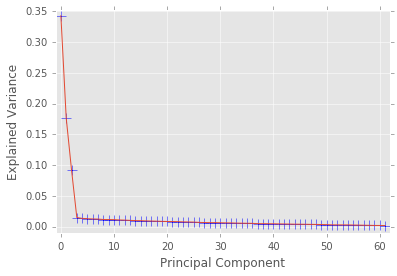

In [24]:
plt.plot(normalized_eigenvalues)

plt.scatter(x = range(len(normalized_eigenvalues)),
    y = normalized_eigenvalues,
    marker = '+',
    s = 100)

plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xlim(-1, len(normalized_eigenvalues))
plt.ylim(-.01, max(normalized_eigenvalues) + .01)

In [21]:
cumulated_normalized_eigenvalues = np.cumsum(normalized_eigenvalues)

In [22]:
cumulated_normalized_eigenvalues

array([ 0.34307738,  0.51999699,  0.61244267,  0.6272357 ,  0.64071659,
        0.65359004,  0.66611909,  0.67841357,  0.69004477,  0.7015948 ,
        0.71300561,  0.72389173,  0.73454241,  0.74477916,  0.75458481,
        0.76428494,  0.77363979,  0.78276753,  0.79167079,  0.8002703 ,
        0.80868162,  0.81696122,  0.82507227,  0.83283465,  0.84042318,
        0.8478255 ,  0.85476794,  0.86145561,  0.8680016 ,  0.87453181,
        0.88087488,  0.88701572,  0.89306643,  0.89884158,  0.90445583,
        0.90993706,  0.91531756,  0.92019088,  0.9250277 ,  0.92976807,
        0.93443781,  0.93890794,  0.94325694,  0.94743745,  0.95145738,
        0.9554173 ,  0.95929212,  0.96299579,  0.96661053,  0.97003984,
        0.97332941,  0.97627533,  0.97914152,  0.98197405,  0.98474868,
        0.98736989,  0.98983645,  0.9921521 ,  0.99432209,  0.99629887,
        0.99822103,  1.        ])

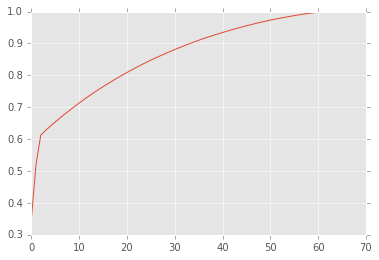

In [23]:
plt.plot(cumulated_normalized_eigenvalues)

### Principal Components/Eigenvectors

In [25]:
pca.components_

array([[ 0.12577537,  0.2491406 , -0.03645547, ...,  0.05007606,
         0.07448159,  0.05265921],
       [-0.05696789,  0.0755372 ,  0.17052116, ...,  0.00357045,
         0.02936008,  0.03368754],
       [ 0.25562272,  0.15818743, -0.07256437, ..., -0.25369009,
        -0.22075579, -0.20049613],
       ..., 
       [-0.18300038,  0.10765282,  0.1692844 , ..., -0.05835726,
        -0.03041397, -0.070239  ],
       [ 0.03850797, -0.10657318,  0.06550309, ..., -0.12311425,
         0.02999196, -0.09988279],
       [-0.11051957, -0.00112376,  0.06794346, ...,  0.0230528 ,
        -0.10056367, -0.07766536]])

In [26]:
pca.components_.shape

(62, 62)

### `n_components = 3`

In [30]:
X = df

# TODO
pca = decomposition.PCA(n_components=3).fit(X)
pca.components_.shape

(3, 62)

In [31]:
X = pca.transform(X)
# TODO
X.shape

(250, 3)

In [32]:
eigenvector_0 = pca.components_[0]
eigenvector_1 = pca.components_[1]
eigenvector_2 = pca.components_[2]

## k-Means

### `n_clusters = 4`

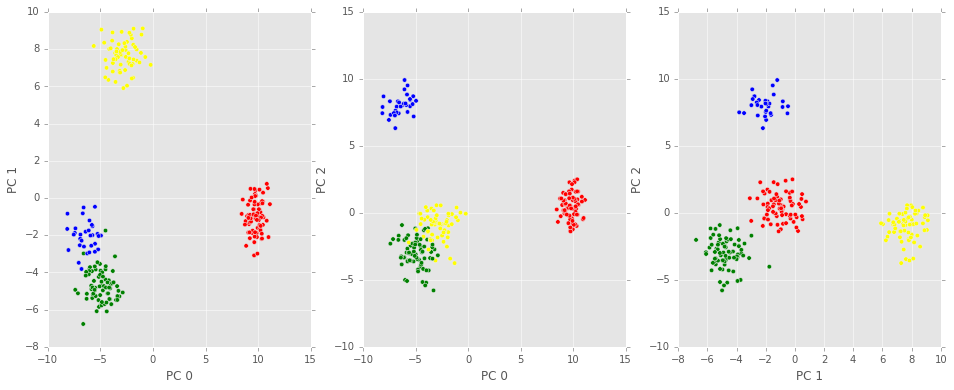

In [62]:
model = cluster.KMeans(n_clusters = 4, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'})  # map returns a generator

_, axes = plt.subplots(1, 3, figsize = (16, 6))

# TODO
import itertools
combs = list(itertools.combinations(range(len(axes)),2))
for i in range(len(axes)):
    axes[i].scatter(X[:,combs[i][0]], X[:,combs[i][1]], c=color)
    axes[i].set_xlabel('PC {0}'.format(combs[i][0]))
    axes[i].set_ylabel('PC {0}'.format(combs[i][1]))

In [53]:
cluster_.value_counts()

0    78
1    75
3    65
2    32
dtype: int64

In [54]:
centroid_78 = pd.Series(pca.inverse_transform(model.cluster_centers_[0]))
centroid_75 = pd.Series(pca.inverse_transform(model.cluster_centers_[1]))
centroid_65 = pd.Series(pca.inverse_transform(model.cluster_centers_[2]))
centroid_32 = pd.Series(pca.inverse_transform(model.cluster_centers_[3]))

## Survey Questions

In [55]:
questions = '''I want a car that is trendy
I am fashion conscious
I do not have the time to worry about car maintenance
Basic transportation is all I need
Small cars are not prestigious
Today's cars last much longer than yesterday's
My car must function with total reliability
I want a car that is easy to handle
I am looking for a car which delivers a smooth ride
When I buy a car, dependability is most important to me
Today's cars are more efficient than yesterday's
I want a car that is fuel economic
I love to drive
The car I buy must be able to handle long motorway journeys
I want the most equipment I can get for my money
I want a vehicle that is environmentally friendly
I want a car that is nippy and zippy
I prefer buying my next car from the same car manufacturer
I wish there were stricter exhaust regulations
One should not spend beyond ones means
Good aerodynamics help fuel economy
Small cars are much safer nowadays
Buying a car on a lower interest rate does not interest me
I want a car that drives well on country roads
I consider myself an authority on cars
Small cars are for kids
Small cars are for women
Domestic made is best made
A car is a fashion accessory to me
Having a masculine car is important to me
I want a comfortable car
City driving is my main concern
Fuel economy comes at the expense of performance
I want a practical car
I have always been fascinated by cars which have a cult following
I like to believe that the car I drive will one day become a cult car
I prefer cars with high performance
I do not believe that a Swatch branded car will be successful
Small cars take up less room in today's traffic
I prefer small cars
In today's world it is anti-social to drive big cars
Many manufacturers do not really care about their customers needs
I would rather deal with a manufacturer's rep than a salesperson
I want to buy a car that makes a statement about me
A car is an extension of oneself
I always want the latest style and design in a vehicle
When it comes to cars my heart rules my head
My car must have a very individual interior
Nowadays smart cars are mainly foreign brands
People ought to buy domestic products for the good of the country
I want a car equipped with the latest features and technology
I have a relationship with my car
Quality and reliability of products are my main concerns
Image is not important to me in a car
Cars all look the same these days
Most environmentally friendly products do not perform as well as those they replaced
I want a car that has character
For me a car is a symbol of freedom and independence
I am interested in car maintenance
When buying a car I only consider a national make
The government should implement policies that favor public transportation
The government is right to tax large cars more heavily than small cars'''

questions = pd.Series(questions.splitlines())

questions

0                           I want a car that is trendy
1                                I am fashion conscious
2     I do not have the time to worry about car main...
3                    Basic transportation is all I need
4                        Small cars are not prestigious
                            ...                        
57    For me a car is a symbol of freedom and indepe...
58                   I am interested in car maintenance
59    When buying a car I only consider a national make
60    The government should implement policies that ...
61    The government is right to tax large cars more...
dtype: object

In [150]:
def interpret(v):
    serraw = pd.Series(v).sort_values(ascending=False)
    ser = pd.Series(abs(v)).sort_values(ascending=False) # magnitude of loadings
    print('Most important questions')
    print()
    for idx,i in enumerate(questions.iloc[ser.index[:5]]):
        print('{0:.3f}'.format(serraw.loc[ser.index[idx]]),ser.index[idx],i)
    print()
    print('Least important questions')
    print()
    for idx,i in enumerate(questions.iloc[ser.index[-5:]]):
        print('{0:.3f}'.format(serraw.loc[ser.index[-1*(idx+1)]]),ser.index[-(idx+1)],i)
    return
    # TODO

### Interpreting the principal components

In [151]:
interpret(eigenvector_0)

Most important questions

-0.278 13 The car I buy must be able to handle long motorway journeys
0.252 40 In today's world it is anti-social to drive big cars
0.249 1 I am fashion conscious
0.242 22 Buying a car on a lower interest rate does not interest me
-0.241 30 I want a comfortable car

Least important questions

-0.003 5 Today's cars are more efficient than yesterday's
-0.005 11 Basic transportation is all I need
-0.005 12 I love to drive
0.011 3 I want a car that is fuel economic
0.011 10 Today's cars last much longer than yesterday's


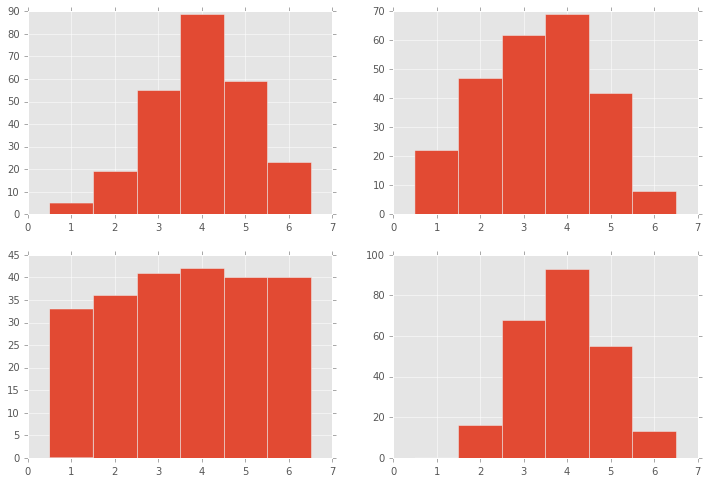

In [155]:
f, axes = plt.subplots(2,2, figsize=(12,8))
bins = np.arange(0.5,7.5,1)
df.Q13.hist(bins=bins, ax=axes[0][0])
df.Q30.hist(bins=bins, ax=axes[0][1])
df.Q5.hist(bins=bins, ax=axes[1][0])
df.Q11.hist(bins=bins, ax=axes[1][1])

In [107]:
interpret(eigenvector_1)

Most important questions

I want a car that is nippy and zippy
Small cars are not prestigious
I want to buy a car that makes a statement about me
Basic transportation is all I need
I want a comfortable car

Least important questions

When buying a car I only consider a national make
I have a relationship with my car
I want a car that is fuel economic
When it comes to cars my heart rules my head
Today's cars last much longer than yesterday's


In [108]:
interpret(eigenvector_2)

Most important questions

Basic transportation is all I need
I want a car that is trendy
When buying a car I only consider a national make
For me a car is a symbol of freedom and independence
I want a car that has character

Least important questions

When it comes to cars my heart rules my head
I am looking for a car which delivers a smooth ride
Most environmentally friendly products do not perform as well as those they replaced
I want a car equipped with the latest features and technology
Today's cars are more efficient than yesterday's


### Interpreting the clusters (that's the market segmentation)

In [174]:
# print(model.labels_.shape)
dfk = pd.concat([df,pd.Series(model.labels_, index=df.index)],axis=1, ignore_index=True)
cols = df.columns.tolist()
cols.append('cluster')
dfk.columns = cols
print(dfk.shape)
dfk.head()

(250, 63)


,Q1,Q2,Q3,Q4,Q5,...,Q59,Q60,Q61,Q62,cluster
id,,,,,,,,,,,
1,6,2,4,3,1,...,4,4,4,2,1
2,7,7,7,5,4,...,3,5,4,5,0
3,5,4,6,5,7,...,5,3,4,4,3
4,4,2,5,4,2,...,5,5,5,3,1
5,5,5,7,6,7,...,4,3,4,5,3


cluster = 0
3.91025641026
cluster = 1
3.97333333333
cluster = 2
3.84375
cluster = 3
4.16923076923


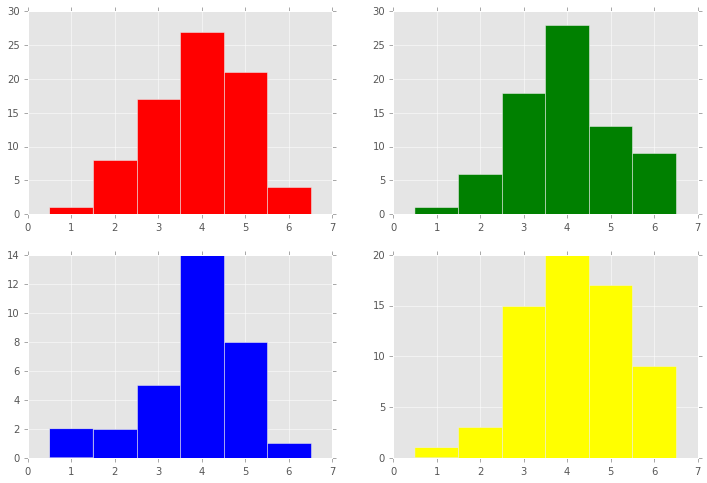

In [188]:
colordict = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
f, axes = plt.subplots(2,2,figsize=(12,8))
for i in range(4):
    print('cluster =',i)
    curr = dfk['Q13'][dfk['cluster']==i]
    print(curr.mean())
    curr.hist(bins=np.arange(0.5,7.5,1), color=colordict[i], ax=axes[i//2][i%2])

In [156]:
interpret(centroid_78)

Most important questions

6.582 46 When it comes to cars my heart rules my head
6.572 47 My car must have a very individual interior
6.513 45 I always want the latest style and design in a vehicle
6.507 43 I want to buy a car that makes a statement about me
6.503 49 People ought to buy domestic products for the good of the country

Least important questions

1.319 23 Image is not important to me in a car
1.360 54 I have a relationship with my car
1.381 55 Most environmentally friendly products do not perform as well as those they replaced
1.408 51 Cars all look the same these days
1.462 53 I want a car that drives well on country roads


In [110]:
interpret(centroid_75)

Most important questions

I want the most equipment I can get for my money
I want a car that is nippy and zippy
Small cars are much safer nowadays
Good aerodynamics help fuel economy
I wish there were stricter exhaust regulations

Least important questions

Having a masculine car is important to me
Domestic made is best made
Buying a car on a lower interest rate does not interest me
I want a car that drives well on country roads
Small cars are not prestigious


In [111]:
interpret(centroid_65)

Most important questions

I prefer cars with high performance
For me a car is a symbol of freedom and independence
I want the most equipment I can get for my money
I want a comfortable car
Small cars are much safer nowadays

Least important questions

In today's world it is anti-social to drive big cars
Small cars are for kids
Many manufacturers do not really care about their customers needs
When buying a car I only consider a national make
The government should implement policies that favor public transportation


In [112]:
interpret(centroid_32)

Most important questions

I have always been fascinated by cars which have a cult following
I prefer cars with high performance
I do not believe that a Swatch branded car will be successful
City driving is my main concern
Basic transportation is all I need

Least important questions

Many manufacturers do not really care about their customers needs
I want to buy a car that makes a statement about me
In today's world it is anti-social to drive big cars
I would rather deal with a manufacturer's rep than a salesperson
Small cars take up less room in today's traffic
